# Open CV Array Processing

In [1]:
import numpy as np
import cv2

## 배열 처리

### 회전

In [3]:
#이미지 읽어오기
src = cv2.imread('./data/lena.jpg')

#이미지 정보를 가져오기
rows, cols, channels = src.shape

#변환 행렬 생성 - 기준좌표, 각도, 크기 비율 
M1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 0.5)
M2 = cv2.getRotationMatrix2D((rows/2, cols/2), -45, 1.0)
print(M1)

#변환 행렬을 가지고 결과를 생성
dst1 = cv2.warpAffine(src, M1, (rows, cols))
dst2 = cv2.warpAffine(src, M2, (rows, cols))


#이미지 출력
cv2.imshow('source', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

#키보드 입력 대기
cv2.waitKey()

#모든 화면을 파괴
cv2.destroyAllWindows()

[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]


## OpenCV의 연산 함수

### numpy 의 연산자 와 OpenCV의 연산 함수

In [11]:
#이미지 읽어오기
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
op = np.zeros(shape=(512, 512), dtype=np.uint8) + 200

#이미지 출력
cv2.imshow('source', src)

#numpy의 더하기 연산 - overflow가 발생해서 연산의 결과를 예측하기 어려움
dst1 = src + op
cv2.imshow('dst1', dst1)
#print(dst1)

#opencv 의 더하기 연산 - 255보다 크면 255
dst2 = cv2.add(src, op)
cv2.imshow('dst2', dst2)

#키보드 입력 대기
cv2.waitKey()

#모든 화면을 파괴
cv2.destroyAllWindows()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [243 242 251 ... 255 255 255]
 [241 242 255 ... 255 255 255]
 [242 244 255 ... 255 255 255]]


### 비트 연산

In [17]:
image1 = np.zeros((300, 300), np.uint8)
image2 = image1.copy()

#높이 와 너비 저장
h, w = image1.shape[:2]
#print(h, w)

#중앙점의 좌표
cx, cy = w//2, h//2
#print(cx, cy)

#image1 에 원 그리기
cv2.circle(image1, (cx, cy), 100, 255, -1)
#image2 에 사각형 그리기
cv2.rectangle(image2, (0, 0, cx, h), 255, -1)

image3 = cv2.bitwise_or(image1, image2)
image4 = cv2.bitwise_and(image1, image2)
image5 = cv2.bitwise_xor(image1, image2)

cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
#합집합
cv2.imshow("or", image3) # 0 or 0 은 0, 0 or 1 은 1
#교집합
cv2.imshow("and", image4) #0 and 0 은 0, 1 and 0 은 0
#교집합 영역은 검정색 교집합이 아닌 영역이 흰색
cv2.imshow("xor", image5) #0 xor 0 은 1 xor 1 은 0 1 xor 0 은 1

cv2.waitKey()
cv2.destroyAllWindows()

### 절대값 연산 과 차분 연산

In [26]:
image1 = cv2.imread('./data/abs_test1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./data/abs_test2.jpg', cv2.IMREAD_GRAYSCALE)

#차분 연산
dif_img1 = cv2.subtract(image1, image2)

#음수 보전
dif_img2 = cv2.subtract(np.int16(image1), np.int16(image2))
#음수 보전한 데이터를 절대값으로 치환
abs_dif1 = np.absolute(dif_img2).astype('uint8')

#차분 절대값 함수 이용
abs_dif2 = cv2.absdiff(image1, image2)

cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.imshow("dif_img1", dif_img1)
cv2.imshow("abs_dif1", abs_dif1)
cv2.imshow("abs_dif2", abs_dif2)

cv2.waitKey()
cv2.destroyAllWindows()

### 최대 최소값을 이용한 화진 개선 - 픽셀의 값들의 차이가 적은 경우 

In [35]:
image = cv2.imread("./data/minMax.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("image", image)

#최소값 과 최대값을 찾아오기
(min_val, max_val, _, _) = cv2.minMaxLoc(image)
print(min_val, max_val)

#최대 - 최소를 가지고 255를 나눔
ratio = 255 / (max_val - min_val)
#이미지를 보정해서 새로운 이미지를 생성
dst = np.round((image-min_val) * ratio).astype('uint8')
(dst_min_val, dst_max_val, _, _) = cv2.minMaxLoc(dst)
print(dst_min_val, dst_max_val)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

13.0 107.0
0.0 255.0


### 사각형 정렬

In [40]:

#행렬 생성
rands = np.zeros((5,5), np.uint16)

#랜덤한 좌표 추출
#사각형의 시작점 좌표로 사용할 데이터 5개 생성
starts = cv2.randn(rands[:, :2], 100, 50)

#사각형의 끝점 좌표로 사용할 데이터 5개 생성
ends = cv2.randn(rands[:, 2:-1], 300, 50)

#print(starts, ends)


#사각형의 모임을 매개변수로 받아서 내용을 출력하는 함수
def print_rects(rects):
    print("사각형 원소\t\t사각형 정보\t\t 크기")
    #인덱스를 i에 넘기고 원래 정보를 튜플에 넘기기
    for i, (x, y, w, h, a) in enumerate(rects):
        print("rects[%i] = [(%3d,%3d) from (%3d,%3d)] %5d"%(i, x, y, w, h, a))
    print()

#사각형 만들기
#시작 좌표와 끝 좌표 빼기 
sizes = cv2.absdiff(starts, ends)
#차이를 곱해서 너비 생성
areas = sizes[:, 0] * sizes[:, 1]
rects = rands.copy()
rects[:, 2:-1] = sizes
rects[:, -1] = areas

#랜덤한 사각형 정보 출력
print_rects(rects)

#사각형 정렬
#areas 를 가지고 정렬을 한 인덱스를 가지고 rects 의 내용을 출력
#idx = cv2.sortIdx(areas, cv2.SORT_EVERY_COLUMN).flatten()

idx = np.argsort(areas, axis=0)

sort_rects = rects[idx.astype('int')]
print(sort_rects)

사각형 원소		사각형 정보		 크기
rects[0] = [( 94, 53) from (320,376)] 54784
rects[1] = [(126,106) from (258,189)] 48762
rects[2] = [(102, 51) from (257,150)] 38550
rects[3] = [(143,163) from (217,143)] 31031
rects[4] = [( 62,128) from (309,100)] 30900

[[   62   128   309   100 30900]
 [  143   163   217   143 31031]
 [  102    51   257   150 38550]
 [  126   106   258   189 48762]
 [   94    53   320   376 54784]]


# 픽셀 처리

## 영상 화소의 접근

In [48]:
### 행렬의 모든 원소를 2개로 변경

mat1 = np.arange(10).reshape(2, 5)
mat2 = np.arange(10).reshape(2, 5)
print(mat1)
print(mat2)

#순서대로 접근
for i in range(mat1.shape[0]):
    for j in range(mat1.shape[1]):
        mat1[i, j] = mat1[i, j] * 2
        
print(mat1)

#순서대로 접근
for i in range(mat2.shape[0]):
    for j in range(mat2.shape[1]):
        mat2.itemset((i, j), mat2.item(i, j) * 2)
print(mat2)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  2  4  6  8]
 [10 12 14 16 18]]
[[ 0  2  4  6  8]
 [10 12 14 16 18]]


### 이미지 반전에서 수행시간 비교

In [50]:
#일반적인 접근 방식
def pixel_access1(image):
    image1 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i, j]
            image1[i, j] = 255 - pixel
    return image1
            
#item 함수 이용
def pixel_access2(image):
    image2 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image.item(i, j)
            image2.itemset((i, j), 255 - pixel)
    return image2

#룩업 테이블 이용
def pixel_access3(image):
    lut = [255-i for i in range(256)]
    lut = np.array(lut, np.uint8)
    image3 = lut[image]
    
    return image3

#OpenCV 함수 이용
def pixel_access4(image):
    image4 = cv2.subtract(255, image)
    return image4
   
#numpy  연산 이용
def pixel_access5(image):
    image5 = 255 - image
    return image5


import time

image = cv2.imread("./data/bright.jpg", cv2.IMREAD_GRAYSCALE)

#수행시간을 체크해주는 함수
def time_check(func, msg):
    start_time = time.perf_counter()
    ret_img = func(image)
    elapsed = (time.perf_counter() - start_time) * 1000
    print(msg, "수행시간: %.2f ms" % elapsed)
    return ret_img

image1 = time_check(pixel_access1, "[방법 1] 직접 접근 방식")
image2 = time_check(pixel_access2, "[방법 2] item() 이용")
image3 = time_check(pixel_access3, "[방법 3] 룩업 테이블 이용 방식")
image4 = time_check(pixel_access4, "[방법 4] OpenCV 함수 이용 방식")
image5 = time_check(pixel_access5, "[방법 5] numpy의 vector 화 된 연산 방식")

cv2.imshow("image", image)
cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.imshow("image3", image3)
cv2.imshow("image4", image4)
cv2.imshow("image5", image5)

cv2.waitKey(0)
cv2.destroyAllWindows()


[방법 1] 직접 접근 방식 수행시간: 410.13 ms
[방법 2] item() 이용 수행시간: 47.88 ms
[방법 3] 룩업 테이블 이용 방식 수행시간: 0.66 ms
[방법 4] OpenCV 함수 이용 방식 수행시간: 0.24 ms
[방법 5] numpy의 vector 화 된 연산 방식 수행시간: 0.18 ms


## 화소 밝기 변환

### 행렬 합 과 곱 연산을 이용한 영상 합성

In [58]:
image1 = cv2.imread("./data/add1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("./data/add2.jpg", cv2.IMREAD_GRAYSCALE)

#numpy 의 modulo 방식으로 255가 넘는 숫자는 0부터 다시 시작해서 값이 설정
add_image1 = image1 + image2
#opencv의 더하기 - 255 이상은 255
add_image2 = cv2.add(image1, image2)

#가중치를 적용하는 방식 - 두 개의 이미지의 절반씩 적용
add_image3 = cv2.add(image1 * 0.5, image2 * 0.5)
add_image3 = np.clip(add_image3, 0, 255).astype("uint8")

#가중치를 다르게 적용
add_image4 = cv2.add(image1 * 0.4, image2 * 0.6)
add_image4 = np.clip(add_image4, 0, 255).astype("uint8")

add_image5 = cv2.add(image1 * 0.7, image2 * 0.6)
add_image5 = np.clip(add_image5, 0, 255).astype("uint8")

cv2.imshow("image1", image1)
cv2.imshow("image2", image2)
cv2.imshow("add_image1", add_image1)
cv2.imshow("add_image2", add_image2)
cv2.imshow("add_image3", add_image3)
cv2.imshow("add_image4", add_image4)
cv2.imshow("add_image5", add_image5)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 명암 대비

In [61]:
image = cv2.imread("./data/contrast.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("image", image)
#더미 영상
noimage = np.zeros(image.shape[:2], image.dtype)

#원본 이미지의 평균의 절반
avg = cv2.mean(image)[0]/2.0

dst1 = cv2.addWeighted(image, 0.5, noimage, 0, avg) #명암대비 감소
dst2 = cv2.addWeighted(image, 2.0, noimage, 0, -avg) #명암대비 증가

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 이진화(임계값 영상) - 특정값을 기준으로 분할

In [67]:
image = cv2.imread("./data/heart10.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("image", image)
print(image[50])

#이미지 이진화
#120 이 넘으면 255 그렇지 않으면 0으로 이진화
ret, dst = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
print(ret)
print(dst[50])
cv2.imshow("dst", dst)

#임계값을 찾아서 이진화
ret1, dst1 = cv2.threshold(
    image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret1)
print(dst1[50])
cv2.imshow("dst1", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

[246 252 255 255 255 255 254 255 255 255 255 255 254 254 254 255 253 252
  95  77 111 101  72 106 252 255 255 255 251 220  75  72 112 113  83 110
 249 252 255 255 254 254 255 255 254 255 105  68  99 101  75  81 226 254
 251 253 253 255 253 255 255 252 255 255 253 155  67  76  75  86  98 104
  98  88  87  99 102  96  93 100  99  98  96  94  98  96 101  83  96  81
  69 149 252 255 252 255 254 255 250 134  63  62  87  80  90 110  92 111
  85  88  94  95  81 100 128  93  96  97 100  94  89  80  82  70  87 232
 251 255 253 253 254 254 254 254 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 254 254 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 254 255 255 254 255 245 255 250 255 142  69  80  72  72  84  94  88
  97 103 104 109 103  89  99 102  94  89  91  93  9

In [5]:
image = cv2.imread("./data/srcThreshold.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("image", image)
#print(image[50])

#임계값을 찾아서 이진화
ret1, dst1 = cv2.threshold(
    image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#print(ret1)
#print(dst1[50])
cv2.imshow("dst1", dst1)

dst2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow("dst2", dst2)
print(dst2[50])

cv2.waitKey(0)
cv2.destroyAllWindows()

[  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 255 25

## Histogram

### 직접 계산

In [7]:
#히스토그램을 계산해서 리턴해주는 함수
#매개변수는 이미지, 계급의 수, 값의 범위
def calc_histo(image, hsize, ranges=[0,256]):
    hist = np.zeros((hsize, 1), np.float32) #히스토그램을 저장할 배열
    
    #계급의 간격 생성
    gap = ranges[1] / hsize
    
    #이미지를 순회하면서 개수를 구함
    for row in image:
        for pix in row:
            idx = int(pix / gap)
            hist[idx] += 1
    return hist

image = cv2.imread("./data/pixel.jpg", cv2.IMREAD_GRAYSCALE)

hsize, ranges = [16], [0, 256]

hist = calc_histo(image, hsize[0], ranges)

print(hist.flatten())

[ 344. 1564. 2976. 3675. 6792. 5799. 4974. 4820. 5930. 6571. 5575. 7696.
 8253. 5040. 1755.  236.]


### 다채널 히스토그램

In [9]:
src = np.array([[0, 0, 0, 0], [1, 1, 3, 5], [6, 1, 1, 3], [4, 3, 1, 7]],
              dtype=np.uint8)

#0 ~ 7 까지를 4개 구간으로 나누어서 히스토그램을 구함
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print(hist1)


#0 ~ 3 까지를 4개 구간으로 나누어서 히스토그램을 구함
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 4])
print(hist2)

[[9.]
 [3.]
 [2.]
 [2.]]
[[4.]
 [5.]
 [0.]
 [3.]]


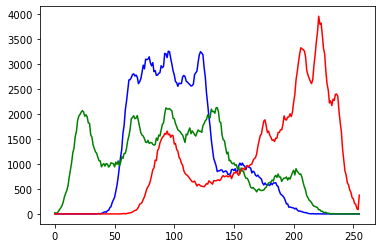

In [10]:
#컬러 이미지 히스토그램 및 그래프
from matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg')

#각 채널의 색상
histColor = ('b', 'g', 'r')

for i in range(3):
    hist = cv2.calcHist(images = [src], channels=[i], mask=None, 
                       histSize=[256], ranges=[0, 256])
    plt.plot(hist, color=histColor[i])
plt.show()

### 히스토그램 스트레칭
#### 특정 범위에 집중적으로 분포된 값들을 넓게 펼쳐서 이미지를 또렷하게 만드는 작업

In [18]:
image = cv2.imread('./data/hist_stretch.jpg', cv2.IMREAD_GRAYSCALE)

#히스토그램 생성 - 값이 가운데 영역에 치우쳐 있음
bsize, ranges = [64], [0, 256]
hist = cv2.calcHist([image], [0], None, bsize, ranges)
print(hist.flatten())

cv2.imshow("image", image)

#빈도수가 가장 높은 값 과 가장 낮은 값을 찾기 위한 함수
def search_value_idx(hist, bias=0):
    for i in range(hist.shape[0]):
        idx = np.abs(bias - i)
        if hist[idx] > 0:
            return idx
    return -1

#각 구간의 너비 구하기
bin_width = ranges[1]/bsize[0]
#빈도수 가 높은 값과 낮은 값 찾기
high = search_value_idx(hist, bsize[0] - 1) * bin_width
low = search_value_idx(hist, 0) * bin_width
print(high)
print(low)

#histogram stretching
idx = np.arange(0, 256)
idx = (idx - low) * 255 / (high - low)
idx[0:int(low)] = 0
idx[int(high+1):] = 255
dst = cv2.LUT(image, idx.astype('uint8'))

cv2.imshow("dst", dst)
hist1 = cv2.calcHist([dst], [0], None, bsize, ranges)
print(hist1.flatten())

cv2.waitKey(0)
cv2.destroyAllWindows()

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.2000e+01 2.0600e+02 9.8200e+02 2.5290e+03 4.4120e+03
 6.7490e+03 6.5730e+03 7.8480e+03 6.2890e+03 5.4840e+03 4.7860e+03
 3.9330e+03 3.7070e+03 4.8560e+03 5.1860e+03 3.9850e+03 4.4330e+03
 4.9520e+03 3.8770e+03 3.2440e+03 9.2070e+03 7.4220e+03 5.3870e+03
 7.2370e+03 6.2470e+03 3.6970e+03 2.9090e+03 5.8620e+03 1.1067e+04
 1.6143e+04 9.7520e+03 3.2890e+03 5.3800e+02 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
180.0
52.0
[[6.000e+00]
 [2.800e+01]
 [9.600e+01]
 [1.910e+02]
 [4.420e+02]
 [9.420e+02]
 [1.249e+03]
 [1.698e+03]
 [2.245e+03]
 [2.668e+03]
 [3.373e+03]
 [3.894e+03]
 [3.053e+03]
 [3.540e+03]
 [3.927e+03]
 [3.722e+03]
 [3.109e+03]
 [2.869e+03]
 [2.804e+03]
 [2.488e+03]
 [2.429e+03]


### 히스토그램 평활화
#### 색상의 분포를 고르게 하는 것

In [23]:
image = cv2.imread('./data/equalize.jpg', cv2.IMREAD_GRAYSCALE)

#히스토그램 생성 - 값이 가운데 영역에 치우쳐 있음
bsize, ranges = [64], [0, 256]
hist = cv2.calcHist([image], [0], None, bsize, ranges)
print(hist.flatten())

cv2.imshow("image", image)

#평활화 - 값의 분포를 균등하게 함
dst = cv2.equalizeHist(image)
cv2.imshow("dst", dst)

hist = cv2.calcHist([dst], [0], None, bsize, ranges)
print(hist.flatten())

cv2.waitKey(0)
cv2.destroyAllWindows()

[   34.    92.   315.  5499. 31607. 22935.  4280.  3643.  4276.  3970.
  3911.  3693.  3821.  3818.  4226.  4611.  4897.  5040.  5005.  4175.
  3298.  1953.  1093.   933.   720.   587.   556.   480.   392.   271.
   188.   154.   134.   125.    91.    70.    89.    56.    69.   183.
  4217.  4594.  2134.  1560.  1761.  2537.  2261.  1297.  1394.  1317.
  1391.  1246.  1105.  1542.  1702.  1821.   764.   946.   899.   597.
   551.   717.  1155.  4002.]
[1414. 1409. 3117.    0. 5578.    0.    0. 7423.    0.    0. 8900.    0.
    0. 9706.    0.    0.    0. 9231.    0. 7031.    0. 4252. 3881. 1984.
 3367. 2333. 3055. 1988. 2981. 2912. 2804. 2757. 2917. 1880. 2963. 2237.
 3466. 2343. 2423. 2482. 3834. 2618. 2387. 3179. 1933. 3489. 2651. 2842.
 2581. 1616. 3631. 2506. 2911. 2544. 2537. 3220. 2720. 2698. 2558. 2616.
 2974. 2764. 2659. 2498.]
